# Trabajo Práctoco Grupal - CEIA Machine Learning I

Alumnos: Alianak, Juan Pablo; Churichi Alan

En este trabajo analizaremos el dataset [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset). El dataset cuenta con una gran cantidad de datos de empleados, como el nivel de educación, satisfacción, performance, edad, etc. 

El objetivo final será predecir la variable *Attrition*, la cual se puede usar como indicadorá de si una persona planea dejar la empresa. *Attrition* toma valores *yes* y *no*, por tanto deberemos resovler un problema de clasificación.

En primer lugar analizaremos el dataset, veremos que variables son importantes en el problema a resolver y haremos el preprocesamiento necesario. Luego entrenaremos distitnos modelos y veremos cual brinda la mejor performance a la hora de predecir *Attrition*.

## 1. Análisis de Datos

Importamos las librerias.

In [1]:
#%load_ext lab_black

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    balanced_accuracy_score,
    confusion_matrix,
    roc_auc_score,
    precision_score,
    recall_score
)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

RANDOM_STATE = 42

Cargamos el dataset.

In [2]:
df_original = pd.read_csv("HR-Employee-Attrition.csv")
df = df_original.copy()

print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 1470 filas y 35 columnas


Observamos las primeras columnas del dataset.

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


También vemos los tipos de los objetos en las distintas columnas.

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### 1.1 Variables Categóricas

Las variables categóricas son:
- Attrition
- BusinessTravel
- Department
- Education
- EducationField
- EmployeeCount
- EnvironmentSatisfaction
- Gender
- JobInvolvement
- JobLevel
- JobRole
- JobSatisfaction
- MaritalStatus
- Over18
- OverTime
- PerformanceRating
- RelationshipSatisfaction
- StandardHours
- StockOptionLevel
- WorkLifeBalance

In [5]:
categorical_variables = [
    "Attrition",
    "BusinessTravel",
    "Department",
    "Education",
    "EducationField",
    "EmployeeCount",
    "EnvironmentSatisfaction",
    "Gender",
    "JobInvolvement",
    "JobLevel",
    "JobRole",
    "JobSatisfaction",
    "MaritalStatus",
    "Over18",
    "OverTime",
    "PerformanceRating",
    "RelationshipSatisfaction",
    "StandardHours",
    "StockOptionLevel",
    "WorkLifeBalance",
]

for variable in categorical_variables:
    print(f"Ocurrencia dentro de {variable}")
    print(df[variable].value_counts(normalize=True))
    print()

Ocurrencia dentro de Attrition
No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Ocurrencia dentro de BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64

Ocurrencia dentro de Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64

Ocurrencia dentro de Education
3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: Education, dtype: float64

Ocurrencia dentro de EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64

Ocurrencia dentro de EmployeeCount
1    1.0
Name: EmployeeCount, dtype: float64

Ocurrencia dentro de EnvironmentSatisfaction
3    0.308163
4    0.303401
2    0.195238
1    0.193197
Name:

Se observan dos datos importantes:
- La variable a predecir Attrition se encuentra desbalanceada. (84% *no* vs 16% *yes*).
- Las variables EmployeeCount, Over18 y StandardHours son constantes, por lo tanto no aportan información. Se decide eliminarlas.

In [6]:
constant_variables = ["EmployeeCount", "Over18", "StandardHours"]
df.drop(constant_variables, axis=1, inplace=True)

Dentro de las variables categoricas listadas arriba, hay varias con relación ordinal que ya se encuentran en el formato deseado, no será necesario hacer encoding de ningún tipo. También hay variables con labels, ninguna de estas presenta una relación ordinal, por lo que podemos aplicar one-hot encoding sobre ellas. 

Pasamos de categorica a numerica aquellas que tengan solo 2 valores posibles. Ademas hacemos un encoding de BusinessTravel a valores 0 (*Non-Travel*) o 1 (*Travel_Rarely* o *Travel_Frequently*).

In [7]:
df["Attrition"] = df["Attrition"].replace(to_replace=["No", "Yes"], value=[0, 1])
df["OverTime"] = df["OverTime"].replace(to_replace=["No", "Yes"], value=[0, 1])
df["Gender"] = df["Gender"].replace(to_replace=["Male", "Female"], value=[0, 1])
df["BusinessTravel"] = df["BusinessTravel"].replace(to_replace=["Non-Travel", "Travel_Rarely", "Travel_Frequently"], value=[0, 0, 1])

### 1.2 Variables Numéricas

Vemos un resumen de las características más importantes de las variables numéricas.

In [8]:
for variable in constant_variables:
    categorical_variables.remove(variable)

df_numerical = df.drop(columns=categorical_variables, axis=1)
df_numerical.describe()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1024.865306,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,602.024335,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,491.250000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1020.500000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1555.750000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,2068.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


Verificamos valores nulos y/o faltantes.

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [10]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

El dataset no presenta valores faltantes.

Graficamos los histogramas de las variables numericas.

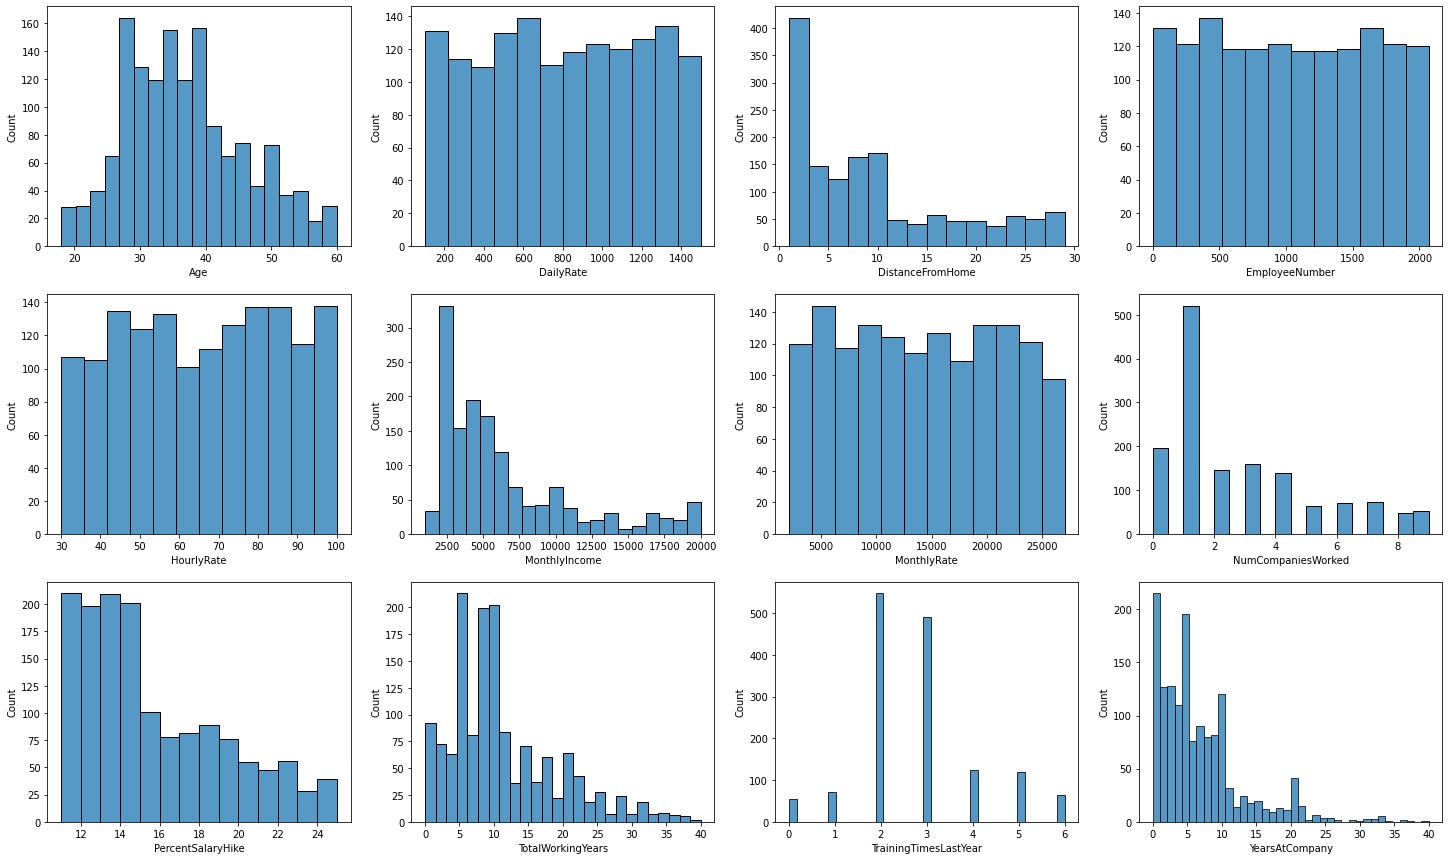

In [11]:
f, axes = plt.subplots(3, 4, figsize=(25, 15))
for ax, feature in zip(axes.flat, df_numerical.columns):
    sns.histplot(df_numerical[feature], ax=ax, kde=False)

"EmployeeNumer" es un identificador único por empleado que no aporta información. Además se puede apreciar en los graficos que las variables "DailyRate", "HourlyRate", "MonthlyRate" son cuasi constantes, se decide eliminarlas.

In [12]:
columns_to_drop = ["DailyRate", "EmployeeNumber", "HourlyRate", "MonthlyRate"]
df_numerical = df_numerical.drop(["DailyRate", "EmployeeNumber", "HourlyRate", "MonthlyRate"], axis=1)
df = df.drop(["DailyRate", "EmployeeNumber", "HourlyRate", "MonthlyRate"], axis=1)

Graficamos los boxplot de las variables numericas.

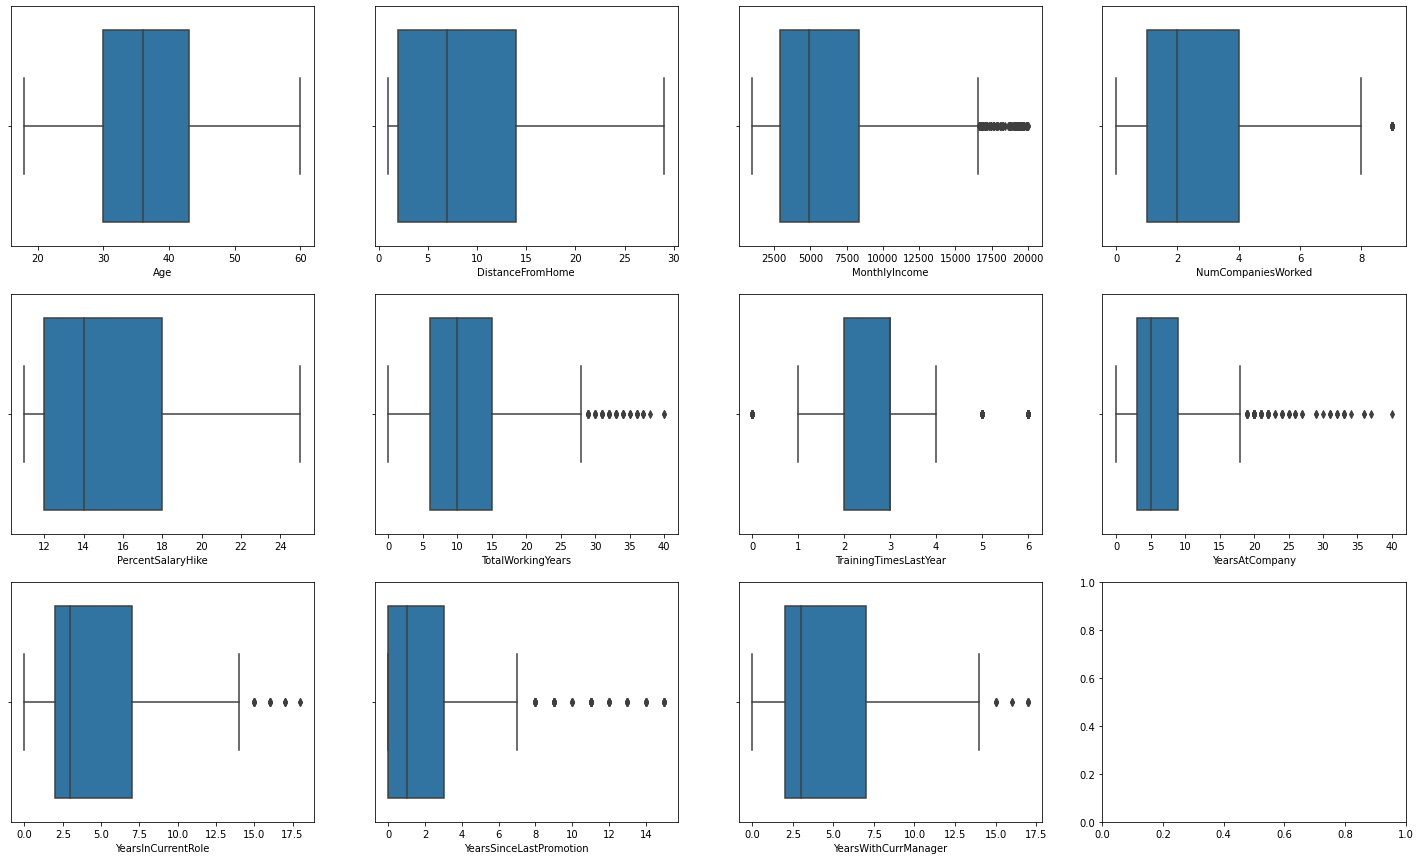

In [13]:
f, axes = plt.subplots(3, 4, figsize=(25, 15))
for ax, feature in zip(axes.flat, df_numerical.columns):
    sns.boxplot(x=df_numerical[feature], ax=ax)

Aunque parece haber outliers en algunas variables, estos no presentan valores excesivamente grandes, por lo que se decide no eliminarlos.

Graficamos boxplots de las distintas variables numéricas en función de la variable a predecir, *Attrition*.

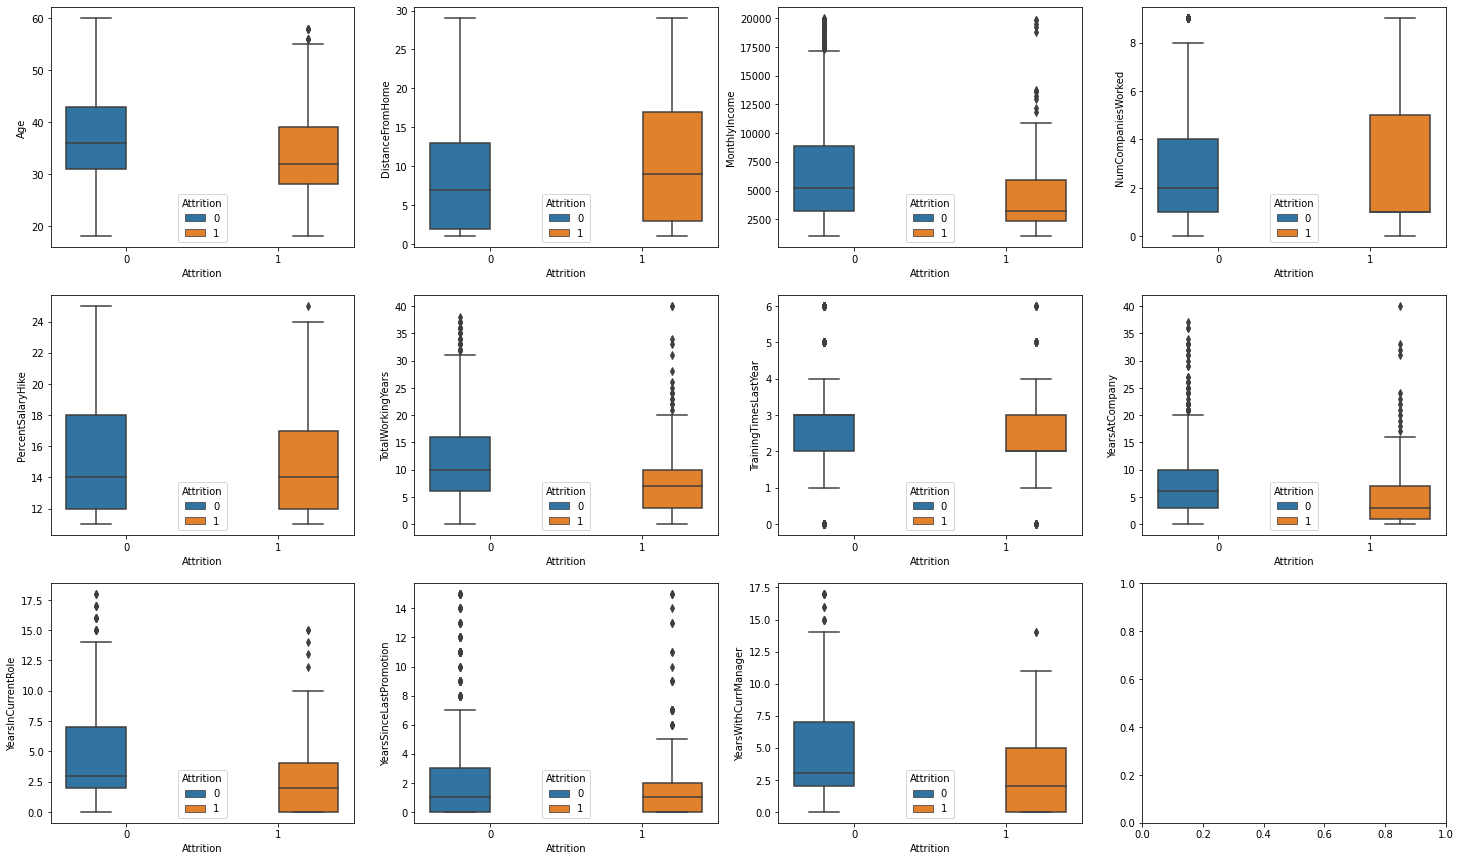

In [15]:
f, axes = plt.subplots(3, 4, figsize=(25, 15))
for ax, feature in zip(axes.flat, df_numerical.columns):
    sns.boxplot(
        x=df["Attrition"],
        y=df_numerical[feature],
        hue=df["Attrition"],
        data=df,
        ax=ax,
    )

Por desgracia, en el boxplot no se puede apreciar ninguna variable que impacte en gran medida el resultado de *Attrition*.

Graficamos la matriz de correlación por el método de Pearson para ver si hay variables numéricas con correlación lineal.

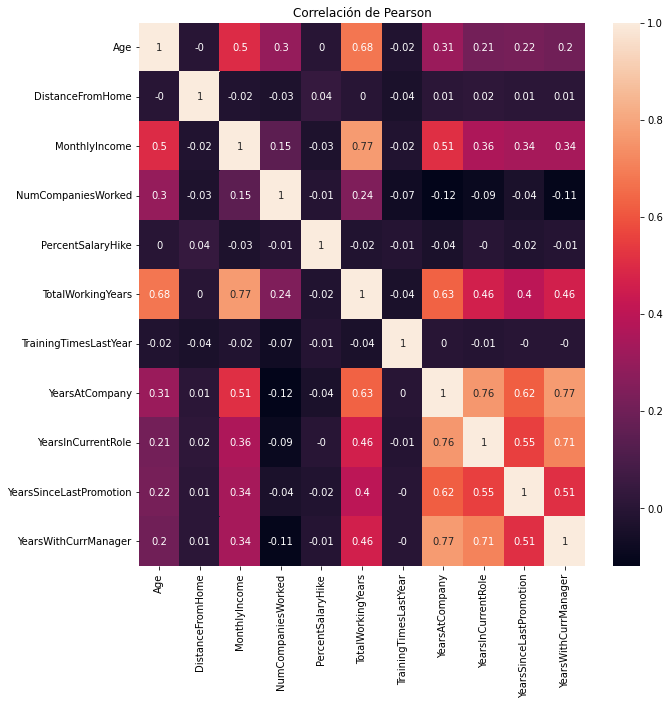

In [16]:
corr_mat_pearson = df_numerical.corr(method="pearson").round(2)
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(data=corr_mat_pearson, annot=True, ax=axes)
axes.set_title("Correlación de Pearson")
print()

Si bien se observan algunas feature con correlaciones altas, no vemos que ninguna sea un transformación lineal de otra, por lo tanto decidimos incluir todas las features dentro del modelo.

Podemos ver la relación lineal entre las variables numéricas y *Attrition* calculando la matriz de correlación por el método de Kendall.

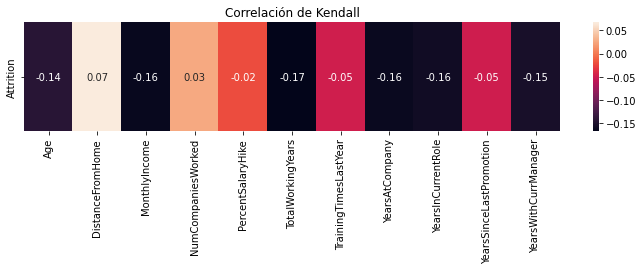

In [17]:
corr_mat_kendall = pd.concat([df["Attrition"], df_numerical], axis=1).corr(method="kendall")

fig, axes = plt.subplots(1, 1, figsize=(12, 2))
sns.heatmap([corr_mat_kendall.iloc[0][1:]], ax=axes, annot=True, fmt=".2f")
axes.set_title("Correlación de Kendall")
axes.set_xticklabels(df_numerical.columns, rotation=90)
axes.set_yticklabels(["Attrition"])
print()

La relación lineal entre "Attrition" y las variables numéricas parece ser bajo en todos los casos.

Realziamos one-hot encoding sobre las variables catergóricas.

In [18]:
df_categorical = pd.get_dummies(df.drop(columns=df_numerical.columns))
df_categorical

,Attrition,BusinessTravel,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,OverTime,PerformanceRating,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,0,2,2,1,3,2,4,1,3,...,0,0,0,0,0,1,0,0,0,1
1,0,1,1,3,0,2,2,2,0,4,...,0,0,0,0,1,0,0,0,1,0
2,1,0,2,4,0,2,1,3,1,3,...,1,0,0,0,0,0,0,0,0,1
3,0,1,4,4,1,3,1,3,1,3,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,1,0,3,1,2,0,3,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,2,3,0,4,2,4,0,3,...,1,0,0,0,0,0,0,0,1,0
1466,0,0,1,4,0,2,3,1,0,3,...,0,0,0,0,0,0,0,0,1,0
1467,0,0,3,2,0,4,2,2,1,4,...,0,0,1,0,0,0,0,0,1,0
1468,0,1,3,4,0,2,2,2,0,3,...,0,0,0,0,0,1,0,0,1,0


Unimos las variables numéricas y categóricas para obtener el nuevo dataset

In [19]:
df = pd.concat([df_numerical, df_categorical], axis=1)
df

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,5993,8,11,8,0,6,4,0,...,0,0,0,0,0,1,0,0,0,1
1,49,8,5130,1,23,10,3,10,7,1,...,0,0,0,0,1,0,0,0,1,0
2,37,2,2090,6,15,7,3,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,33,3,2909,1,11,8,3,8,7,3,...,0,0,0,0,1,0,0,0,1,0
4,27,2,3468,9,12,6,3,2,2,2,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2571,4,17,17,3,5,2,0,...,1,0,0,0,0,0,0,0,1,0
1466,39,6,9991,4,15,9,5,7,7,1,...,0,0,0,0,0,0,0,0,1,0
1467,27,4,6142,1,20,6,0,6,2,0,...,0,0,1,0,0,0,0,0,1,0
1468,49,2,5390,2,14,17,3,9,6,0,...,0,0,0,0,0,1,0,0,1,0


In [20]:
print(f"El nuevo dataset tiene {df.shape[1]} columnas")

El nuevo dataset tiene 45 columnas


Vemos que el nuevo dataset tenemos un gran número de columnas. Probablemete muchas de estas no aporten información para el problema de clasificación a resolver.

Para quedarnos con las features mas importantes utilizaremos un modelo de Random Forest.

Pero para utilizar nuestros datos en un modelo de Random Forest se realizan primero los siguientes pasos:

- Separamos la variable a predecir *Attrition* del resto.
- Dividimos el dataset en train y test con un split 80-20 de manera estratificada para que la cantidad de ocurrencias de cada clase de *Attrition* sea igual en ambos conjuntos.
- Estandarizamos los datos utilizando el método z-score.

In [21]:
def dataset_preprocessing(df, verbose=False):
  # Definimos la variable objetivo a predecir (y) y las feature (X)
  y = df["Attrition"]
  X = df.drop("Attrition", axis=1)

  # Dividimos el set de datos en entrenamiento y testeo
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
    )
  if (verbose):
    print("Composición del training set:")
    print(y_train.value_counts())
    print("\nComposición del test set:")
    print(y_test.value_counts())

  # Estandarizamos los datos
  scaler = StandardScaler().fit(X_test)
  X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
  X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

  return X_train, X_test, y_train, y_test

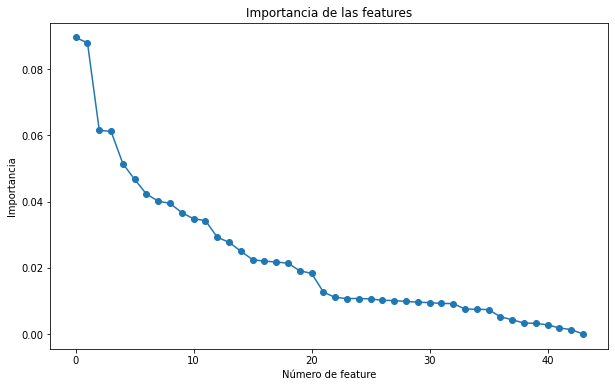

In [22]:
X_train, X_test, y_train, y_test = dataset_preprocessing(df)

model = RandomForestClassifier(n_estimators=10, class_weight="balanced", random_state=RANDOM_STATE)
model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'features': X_train.columns ,
    'feature_importance': model.feature_importances_
    })
feature_importances.sort_values('feature_importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
plt.scatter(range(feature_importances.shape[0]), feature_importances["feature_importance"])
plt.plot(range(feature_importances.shape[0]), feature_importances["feature_importance"])
plt.title("Importancia de las features")
plt.xlabel("Número de feature")
plt.ylabel("Importancia")
plt.show()

Analizando la gráfica de importancia de las features decidimos quedaron los las 20 que presentan mayor importancia a la hora de predecir *Attrition*. Estas son:

In [23]:
feature_importances.iloc[:20]

,features,feature_importance
2,MonthlyIncome,0.089548
0,Age,0.087920
1,DistanceFromHome,0.061495
7,YearsAtCompany,0.061184
5,TotalWorkingYears,0.051421
10,YearsWithCurrManager,0.046679
3,NumCompaniesWorked,0.042242
18,OverTime,0.040111
8,YearsInCurrentRole,0.039441
6,TrainingTimesLastYear,0.036632


In [24]:
important_columns = feature_importances.iloc[:20]["features"].to_numpy()
important_columns = np.append(important_columns, ["Attrition"])
df = df[important_columns]
df

,MonthlyIncome,Age,DistanceFromHome,YearsAtCompany,TotalWorkingYears,YearsWithCurrManager,NumCompaniesWorked,OverTime,YearsInCurrentRole,TrainingTimesLastYear,...,StockOptionLevel,EnvironmentSatisfaction,JobSatisfaction,Education,JobLevel,RelationshipSatisfaction,YearsSinceLastPromotion,WorkLifeBalance,MaritalStatus_Single,Attrition
0,5993,41,1,6,8,5,8,1,4,0,...,0,2,4,2,2,1,0,1,1,1
1,5130,49,8,10,10,7,1,0,7,3,...,1,3,2,1,2,4,1,3,0,0
2,2090,37,2,0,7,0,6,1,0,3,...,0,4,3,2,1,2,0,3,1,1
3,2909,33,3,8,8,0,1,1,7,3,...,0,4,3,4,1,3,3,3,0,0
4,3468,27,2,2,6,2,9,0,2,3,...,1,1,2,1,1,4,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2571,36,23,5,17,3,4,0,2,3,...,1,3,4,2,2,3,0,3,0,0
1466,9991,39,6,7,9,7,4,0,7,5,...,1,4,1,1,3,1,1,3,0,0
1467,6142,27,4,6,6,3,1,1,2,0,...,1,2,2,3,2,2,0,3,0,0
1468,5390,49,2,9,17,8,2,0,6,3,...,0,4,2,3,2,4,0,2,0,0


## 2. Modelos de Machine Learning

Se ha realizado un análisis de los datos y hemos seleccionado los que aportan más información a la hora de resolver nuestro problema.
Probamos diferentes modelos con la clase Attrition desbalanceada. Utilizamos el parámetro *class_weight=True* para que el modelo realice un balanceo según la frecuencia de las clases.

Los modelos a utilizar son:
- SVM - Linear kernel
- SVM - rbf non-linear kernel
- K-Nearest Neighbors
- Decission Tree
- Random Forest
- Logistic Regression

Como la variable a predecir se encuentra desbalanceada no podemos utilizar la métrica tradicional accuracy. Por esta razón evaluaremos la performance de nuestro modelo de acuerdo a otras métricas. Para cada modelo verémos las métricas "AUC ROC", "Balanced Accuracy", "Precison" y "Recall".

Como lo que nos mas interesa en este caso es predecir correctamente los casos positivos (True Positive) y evitar clasificar como negativo los casos positivos (False Negative) le deberemos dar más importancia a la métrica "Recall", cuya fórmula es:

 $Recall=\dfrac{TP}{TP+FN}$



In [25]:
def result_modelos_clasif(model_name, X_test, y_test, y_pred, y_proba, plot=True):
    scores_report = [
      f"{model_name}\n",
      f"Area bajo la curva ROC: {roc_auc_score(y_test, y_proba[:, 1]):.4f}",
      f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}",
      f"Precision: {precision_score(y_test, y_pred):.4f}",
      f"Recall: {recall_score(y_test, y_pred):.4f}\n\n"
    ]
    scores_report = '\n'.join(scores_report)

    if(plot):
      fig, ax = plt.subplots(1, 2, figsize=(8, 3))
      fig.tight_layout(w_pad=2)

      t = ax[0].text(0.5, 0.1, scores_report, fontsize=14)
      t.set_ha('center')
      ax[0].set_xticks([])
      ax[0].set_yticks([])
      ax[0].spines['top'].set_visible(False)
      ax[0].spines['right'].set_visible(False)
      ax[0].spines['bottom'].set_visible(False)
      ax[0].spines['left'].set_visible(False)

      cm = confusion_matrix(y_test, y_pred)
      cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
      cm_disp.plot(ax=ax[1])
    else:
      print(scores_report)


def test_classifiers(X_train, y_train, X_test, y_test):
  classifiers = [
    [
        SVC(kernel="linear", 
            probability=True,
            class_weight="balanced", 
            random_state=RANDOM_STATE),
        "SVM - Linear kernel",
    ],
    [
        SVC(kernel="rbf", 
            probability=True,
            class_weight="balanced", 
            random_state=RANDOM_STATE),
        "SVM - rbf non-linear kernel",
    ],
    [KNeighborsClassifier(), "K-Nearest Neighbors"],
    [DecisionTreeClassifier(class_weight="balanced"), "Decision Tree Classifier"],
    [
        RandomForestClassifier(
            n_estimators=10,
            class_weight="balanced", 
            random_state=RANDOM_STATE),
        "Random Forest",
    ],
    [LogisticRegression(class_weight="balanced"), "Logistic Regression"],
  ]

  for classifier in classifiers:
      model = classifier[0]
      model.fit(X_train, y_train)
      
      y_pred = model.predict(X_test)
      y_proba = model.predict_proba(X_test)

      result_modelos_clasif(classifier[1], X_test, y_test, y_pred, y_proba)

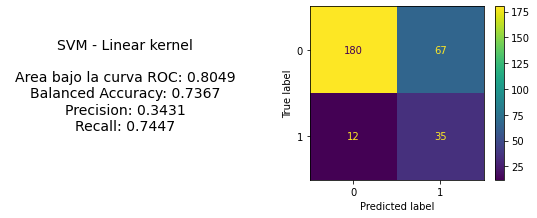

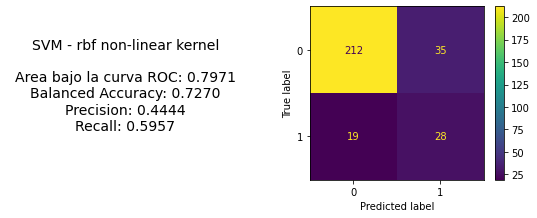

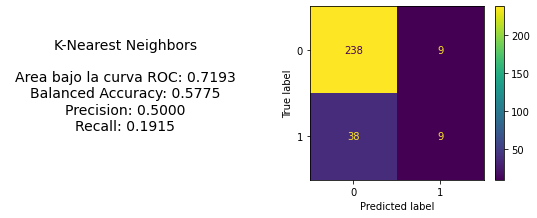

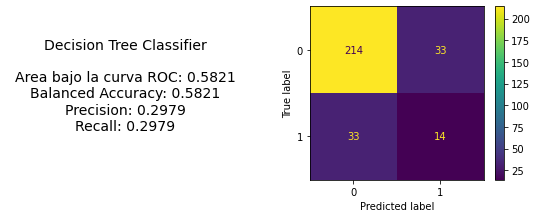

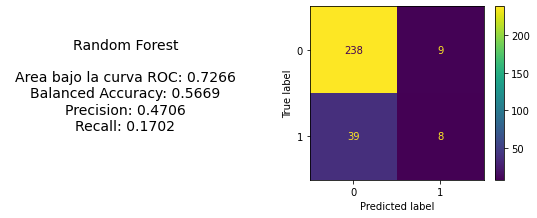

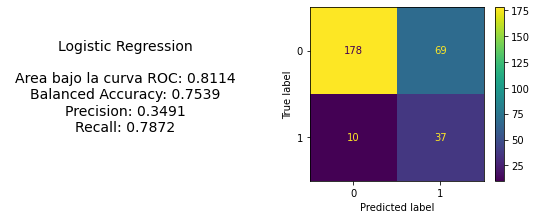

In [26]:
X_train, X_test, y_train, y_test = dataset_preprocessing(df)
test_classifiers(X_train, y_train, X_test, y_test)

Vemos que los mejores resultados son los obtenidos por los modelos *SVM - Linear kernel* y *Logistic Regression*.

Probamos hacer oversampling de las muestras minoritarias y volver a entrenar los modelos. El oversampling se hará solamente para los datos de entrenamiento.

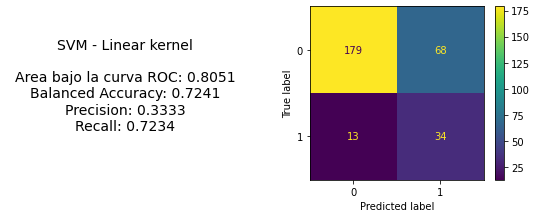

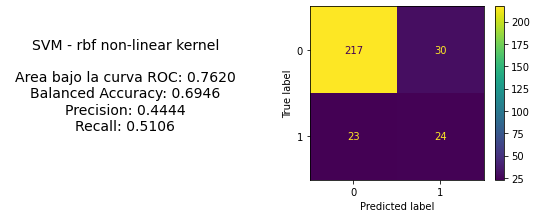

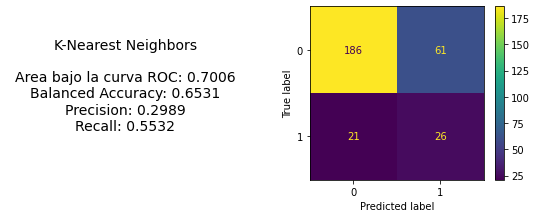

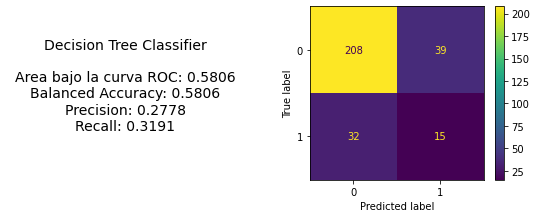

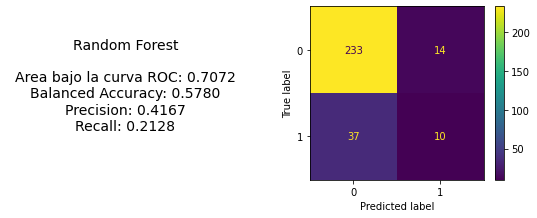

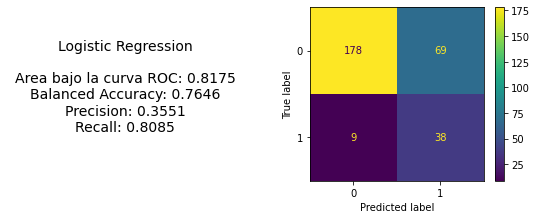

In [27]:
oversampler = RandomOverSampler(sampling_strategy="minority", random_state=RANDOM_STATE)
X_train_ov, y_train_ov = oversampler.fit_resample(X_train, y_train)

test_classifiers(X_train_ov, y_train_ov, X_test, y_test)

Vemos que las métricas no varían mucho, pero el modelo de *Logistic Regression* obtienen mejores resultasdos.

Probamos ralizando undersampling de la clase mayoritaria en los datos de train.

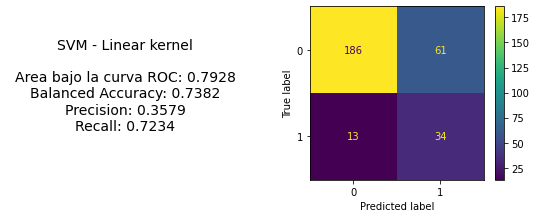

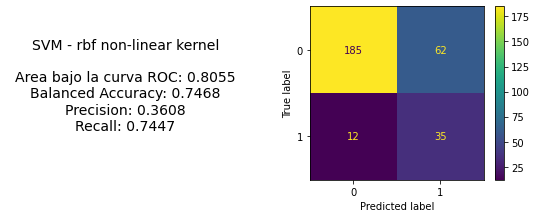

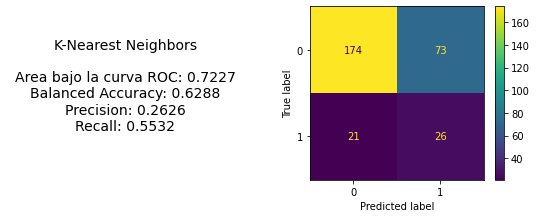

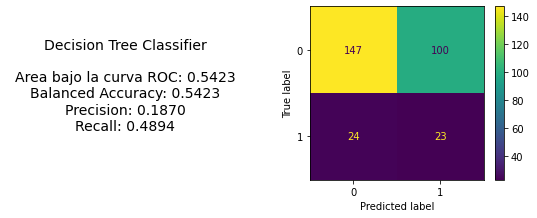

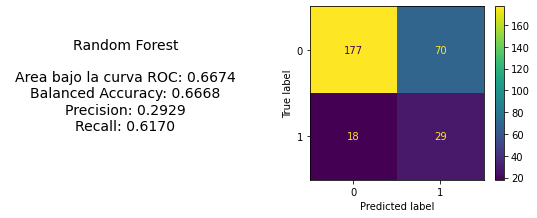

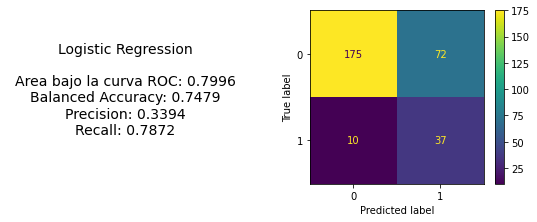

In [28]:
undersampler = RandomUnderSampler(sampling_strategy="majority", random_state=RANDOM_STATE)
X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

test_classifiers(X_train_us, y_train_us, X_test, y_test)

Los resultados obtenidos para *SVM - Linear kernel* y *Logistic Regression* son peores, sin embargo los resultados para *SVM - rbf kernel* mejoran.

En modelo que mejor resultados dio fue *Logistic Regression* en el caso con oversampling de la clase minoritaria. Probamos con distintos hiperparámetros para ver si podemos mejorar la performance.

#### Hiperparámetros de *Logistic Regression*

Probamos con distintos algoritmos de regresión que ofrece la librería sklearn

In [29]:
solvers = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]

for solver in solvers:
    model = LogisticRegression(solver=solver, class_weight="balanced")
    model.fit(X_train_ov, y_train_ov)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    result_modelos_clasif(
        f"Linear Regression with {solver} solver", 
        X_test, 
        y_test, 
        y_pred, 
        y_proba, 
        plot=False
      )

Linear Regression with newton-cg solver

Area bajo la curva ROC: 0.8175
Balanced Accuracy: 0.7646
Precision: 0.3551
Recall: 0.8085


Linear Regression with lbfgs solver

Area bajo la curva ROC: 0.8175
Balanced Accuracy: 0.7646
Precision: 0.3551
Recall: 0.8085


Linear Regression with liblinear solver

Area bajo la curva ROC: 0.8174
Balanced Accuracy: 0.7646
Precision: 0.3551
Recall: 0.8085


Linear Regression with sag solver

Area bajo la curva ROC: 0.8175
Balanced Accuracy: 0.7646
Precision: 0.3551
Recall: 0.8085


Linear Regression with saga solver

Area bajo la curva ROC: 0.8175
Balanced Accuracy: 0.7646
Precision: 0.3551
Recall: 0.8085




A pesar de usar distintos metodos de resolución para el algoritmo el resultado es exacetamente igual en todos los casos.

Probamos con distintas regularizaciones.

In [30]:
penalties = ["l1", "l2"]

for penalty in penalties:
    model = LogisticRegression(
        solver="liblinear", penalty=penalty, class_weight="balanced"
    )
    model.fit(X_train_ov, y_train_ov)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    result_modelos_clasif(
        f"Linear Regression with {solver} solver", 
        X_test, 
        y_test, 
        y_pred, 
        y_proba, 
        plot=False
      )

Linear Regression with saga solver

Area bajo la curva ROC: 0.8170
Balanced Accuracy: 0.7646
Precision: 0.3551
Recall: 0.8085


Linear Regression with saga solver

Area bajo la curva ROC: 0.8174
Balanced Accuracy: 0.7646
Precision: 0.3551
Recall: 0.8085




En ningún caso se observaron mejores resultados.

## 3. Conclusiones

Concluimos en que el mejor modelo para predecir *Attrition* es el de Regresión Logistica utilizando oversampling en los datos de entrenamiento para tratar el problema de las clases desbalanceadas. El segundo modelo que mejores resultados da es el SVM con kernel lineal.

Durante en análisis de datos vimos que la variable a predecir *Attrition* no presentaba fuerte correlación con las demás features, por lo tanto intuíamos que no iba a ser un problema fácil de resolver y los resultados posiblemente no serían los mejores. Sin embargo, nos encontramos conformes con los resultados obtenidos, ya que a pesar de no se los mejores, es mejor aplicar el modelo que realizar una predicción aleatoria.

Sin duda este modelo podría aplicarse en un entorno real para solucionar un problema como el planteado.